## Exploring aspects of the CFM 

1. What is in the MERRA pkl file?
2. How to efficiently read and plot the output files.

In [1]:
# libraries

import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import os as os
import sys 
import xarray as xr
import netCDF4

## run from notebooks folder
homepath= '/home/michaeltown/work/projects/cfm/repos/CommunityFirnModel/CFM_main/'
sys.path.append(homepath)

In [2]:
# load the pickled MERRA-2 data 

pklList = os.listdir(homepath)
pklList = [p for p in pklList if p[-3:] == 'pkl']
df_daily = pd.read_pickle(homepath+pklList[0])

In [3]:
df_daily

,TS,EVAP,SMELT,PRECTOT,PRECSNO
time,,,,,
1980-01-01,235.668045,-0.036549,0.0,0.314766,0.314766
1980-01-02,231.323288,-0.035914,0.0,0.120460,0.120460
1980-01-03,234.964981,-0.069931,0.0,0.251130,0.251130
1980-01-04,232.422836,-0.042403,0.0,0.175063,0.175063
1980-01-05,233.590408,-0.082655,0.0,0.182788,0.182788
...,...,...,...,...,...
2020-12-27,232.138840,-0.021912,0.0,0.275491,0.275491
2020-12-28,230.537491,-0.034267,0.0,0.205349,0.205349
2020-12-29,241.417099,-0.018527,0.0,1.705563,1.705563


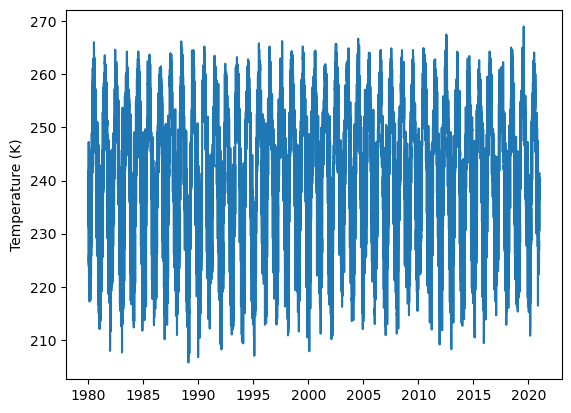

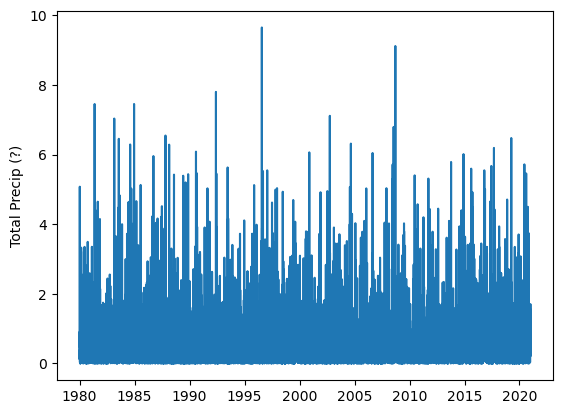

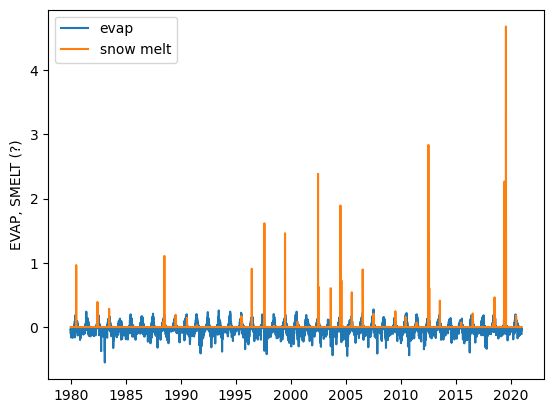

In [4]:
plt.figure()
plt.plot(df_daily.index,df_daily.TS)
plt.ylabel('Temperature (K)')

plt.figure()
plt.plot(df_daily.index,df_daily.PRECTOT)
plt.ylabel('Total Precip (?)')

plt.figure()
plt.plot(df_daily.index,df_daily.EVAP,label = 'evap')
plt.plot(df_daily.index,df_daily.SMELT,label = 'snow melt')
plt.ylabel('EVAP, SMELT (?)')
plt.legend()


### Questions on input data

1. What are the units of evap, snow melt?
2. Does negative evap mean deposition in MERRA-2?
3. What are units of precip?
4. Why have a snow melt parameter? Shouldn't CFM be doing this itself?

## Understanding output data

,0
0,IsoSpin_d18O
1,IsoSpin_dD
2,ageSpin
3,bdot_meanSpin
4,densitySpin
5,depthSpin
6,iso_sig2_d18O
7,iso_sig2_dD
8,tempSpin


In [16]:
df_out.index

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 237626 entries, (1452.0819091796875, 1452.0819672131147) to (2020.997314453125, 120.0)
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age            211512 non-null  float32
 1   density        211512 non-null  float32
 2   temperature    211512 non-null  float32
 3   LWC            237626 non-null  float32
 4   iso_sig2_d18O  211512 non-null  float32
 5   iso_sig2_dD    211512 non-null  float32
 6   isotopes_d18O  211512 non-null  float32
 7   isotopes_dD    211512 non-null  float32
dtypes: float32(8)
memory usage: 8.2 MB


### Questions about model input/output

1. Why is the model 'start time' 1452? This appears in the model run, as well as the model example output. However, it does not appear in the MERRA-2 data.
2. 